In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [38]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
df = pd.read_csv('df_train.csv')
df.drop(columns =['Unnamed: 0'], inplace=True)

**Select The Sate you are Supposed to do an EDA o and Proceed on this Notebok** 

In [13]:
madrid = df[['Madrid_wind_speed','Madrid_humidity','Madrid_clouds_all',
             'Madrid_rain_1h','Madrid_weather_id','Madrid_pressure',
             'Madrid_temp_max','Madrid_temp','Madrid_temp_min','load_shortfall_3h']]

valencia = df[['Valencia_wind_speed',
               'Valencia_snow_3h','Valencia_pressure','Valencia_temp_max',
               'Valencia_temp','Valencia_humidity','Valencia_temp_min','load_shortfall_3h']]
#'Valencia_wind_deg',
bilbao = df[['Bilbao_rain_1h','Bilbao_clouds_all','Bilbao_wind_speed',
             'Bilbao_wind_deg','Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id',
             'Bilbao_temp_min','Bilbao_temp','Bilbao_temp_max','load_shortfall_3h']]

seville = df[['Seville_humidity','Seville_clouds_all','Seville_wind_speed',
              'Seville_rain_1h','Seville_rain_3h','Seville_weather_id',
              'Seville_temp_max','Seville_temp','Seville_temp_min','load_shortfall_3h']]

barcelona = df[['Barcelona_wind_speed','Barcelona_wind_deg','Barcelona_rain_1h',
                'Barcelona_pressure','Barcelona_rain_3h','Barcelona_weather_id',
                'Barcelona_temp_max','Barcelona_temp','Barcelona_temp_min','load_shortfall_3h']]
#'Seville_pressure',

## Check for Missing Values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [253]:
valencia.Valencia_pressure.isna().sum()

2068

In [254]:
valencia.describe().T

,count,mean,std,min,25%,50%,75%,max
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,52.000000
Valencia_snow_3h,8763.0,0.000205,0.011866,0.000000,0.000000,0.000000,0.000000,0.791667
Valencia_pressure,6695.0,1012.051407,9.506214,972.666667,1010.333333,1015.000000,1018.000000,1021.666667
Valencia_temp_max,8763.0,291.337233,7.565692,269.888000,285.550167,291.037000,297.248333,314.263333
Valencia_temp,8763.0,290.592152,7.162274,269.888000,285.150000,290.176667,296.056667,310.426667
Valencia_humidity,8763.0,65.247727,19.262322,10.333333,51.333333,67.000000,81.333333,100.000000
Valencia_temp_min,8763.0,289.867648,6.907402,269.888000,284.783333,289.550000,294.820000,310.272000
load_shortfall_3h,8763.0,10673.857612,5218.046404,-6618.000000,7390.333333,11114.666667,14498.166667,31904.000000


**There are total of 2068 missing value in the valencia dataset all in the wind pressure column, since this a  to time series data(values of pressure collected over a 3 hour period), we would use forward filing method to fill the data**

In [40]:
df['Valencia_pressure'] = df['Valencia_pressure'].ffill()

## Skewness and Kurtosis

In [256]:
skewness = pd.DataFrame(valencia.skew(), valencia.columns, columns =['Features'])
lst = ['High positive Skew','Very High Positive Skew',
      'Moderate Negative Skew','Fairly Symmetrical','Fairly Symmetrical',
      'Fairly Symmetrical','Fairly Symmetrical','Fairly Symmetrical']
position = ['Right Skewed','Right Skewed','Left Skewed',
           'Evenly Distributed','Evenly Distributed',
            'Fairly Distributed','Evenly Distributed',
           'Evenly Distributed']
skewness['Skewness'] = lst
skewness['Description'] = position
skewness

,Features,Skewness,Description
Valencia_wind_speed,3.499637,High positive Skew,Right Skewed
Valencia_snow_3h,63.298084,Very High Positive Skew,Right Skewed
Valencia_pressure,-1.705162,Moderate Negative Skew,Left Skewed
Valencia_temp_max,0.082672,Fairly Symmetrical,Evenly Distributed
Valencia_temp,0.057476,Fairly Symmetrical,Evenly Distributed
Valencia_humidity,-0.305757,Fairly Symmetrical,Fairly Distributed
Valencia_temp_min,0.081832,Fairly Symmetrical,Evenly Distributed
load_shortfall_3h,-0.384847,Fairly Symmetrical,Evenly Distributed


In [257]:
kurt = pd.DataFrame(valencia.kurtosis(), valencia.columns, columns=['Features'])
kurt['Description'] = np.where(kurt.Features > 3, 'Contains High amount of Outliers','Little or No Outliers')
kurt

,Features,Description
Valencia_wind_speed,35.645426,Contains High amount of Outliers
Valencia_snow_3h,4089.323165,Contains High amount of Outliers
Valencia_pressure,2.211823,Little or No Outliers
Valencia_temp_max,-0.613755,Little or No Outliers
Valencia_temp,-0.643793,Little or No Outliers
Valencia_humidity,-0.734345,Little or No Outliers
Valencia_temp_min,-0.599551,Little or No Outliers
load_shortfall_3h,-0.118999,Little or No Outliers


## Confirm Presence of Outliers With Boxplots

<AxesSubplot:xlabel='Valencia_wind_speed'>

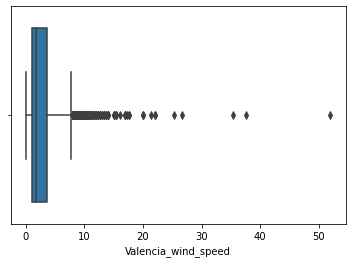

In [258]:
sns.boxplot(x='Valencia_wind_speed', data=valencia)

<AxesSubplot:xlabel='Valencia_snow_3h'>

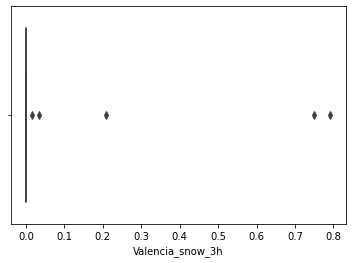

In [259]:
sns.boxplot(x='Valencia_snow_3h', data=valencia)

In [198]:
valencia.Valencia_wind_speed.describe()

count    8763.000000
mean        2.586272
std         2.411190
min         0.000000
25%         1.000000
50%         1.666667
75%         3.666667
max        52.000000
Name: Valencia_wind_speed, dtype: float64

In [243]:
# plot_data = df[['time','Valencia_snow_3h']]
# plot_data = plot_data[plot_data['time']<= '2015-31-12 23:00:00']
# plot_data['time'] = pd.to_datetime(plot_data['time'])
# plot_data.set_index('time', inplace = True)
# plot_data = plot_data.resample('M').sum()

# plt.plot(plot_data.index,plot_data['Valencia_snow_3h'])

**Create a scatter plot of each predictor against the Response variable load_shortfall_3h**

In [15]:
def scatter_plot(data, row = 2, col = 5):
    fig, axs = plt.subplots(row,col, figsize=(14,6),)
    fig.subplots_adjust(hspace = 1.0, wspace=.4)
    axs = axs.ravel()

    for index, column in enumerate(data.drop(columns='load_shortfall_3h').columns):
        axs[index-1].set_title("{}".format(column),fontsize=16)
        axs[index-1].scatter(x=data[column],y=data['load_shortfall_3h'],color='blue',edgecolor='k')

    fig.tight_layout(pad=1)

In [16]:
def heat_map(data):
    plt.figure(figsize=(15,10))
    mask = np.triu(np.ones_like(data.drop(columns = 'load_shortfall_3h').corr(),
                                dtype=np.bool))
    heatmap = sns.heatmap(data.drop(columns = 'load_shortfall_3h').corr(), vmin =-1,
                          vmax=1, annot =True, mask= mask, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad = 12)

In [17]:
def correlation_df(data):
    df_corr = data.corr()['load_shortfall_3h'].sort_values(ascending = False)
    df_ = pd.DataFrame(df_corr)
    df_.columns = ['Correlations']
    return  df_

In [18]:
def pearson_pval(data):
    from scipy.stats import pearsonr
    #Compute correlation of predictors with response variable
    corr_df = data.corr()['load_shortfall_3h'].sort_values(ascending = False)
    # Build dictionary that would store correlation values and P-Values
    corr_dict = {}
    col_titles = [col for col in corr_df.index if col != 'load_shortfall_3h']
    for column in col_titles:
        p_val = round(pearsonr(data[column], data['load_shortfall_3h'])[1],6)
        corr_dict[column] = {'Correlation_coeff': corr_df[column],
                             'P_Value': p_val}
    p_val_df = pd.DataFrame(corr_dict).T
    p_val_df = p_val_df.sort_values('P_Value')
    return p_val_df

In [19]:
def show_multicollinearity(data):
    #Call the p-value function created earlier
    pval_df = pearson_pval(data)
    x_names = list(pval_df[pval_df['P_Value'] < 0.03].index)
    x_data  = data[x_names]
    y_data = data['load_shortfall_3h']
    
    corr = x_data.corr()
    ## Lets find rows and columns where correlation coefficient is > 0.9
    r, c = np.where(np.abs(corr) > 0.9)

    # Lets take on the off diagonal Entries
    diagonal = np.where(r != c)

    # Show the correlation matrix where the constraint is met
    p = corr.iloc[r[diagonal], c[diagonal]]
    p = p.drop_duplicates(subset=p.columns[0])
    return p

In [20]:
def scaler_(data):
    p_val = pearson_pval(data)
    x_names = list(p_val[p_val['P_Value'] < 0.03].index)
    x_data = data[x_names]
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x_data)
    x_normalized = pd.DataFrame(x_scaled, columns = x_data.columns)
    return x_normalized

In [21]:
def variance_threshold(data, threshold = 0.03):
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold(threshold = threshold)
    normalized = scaler_(data)
    selector.fit(normalized)
    
    col_variance = selector.variances_
    variance_dict = {}
    variance_dict = [{'Variable_Name': column_name, 'Variance': col_var}
                     for column_name, col_var in zip(normalized.columns,col_variance)]
    var_df = pd.DataFrame(variance_dict)
    var_df = var_df.sort_values(by='Variance')
    return var_df

In [22]:
def show_selected_variable(data,threshold = 0.03):
    normalized = scaler_(data)
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold(threshold = threshold)
    selector.fit(normalized)
    x_new = normalized[normalized.columns[selector.get_support(indices=True)]]
    return x_new

# Valencia

## Test for Linearity

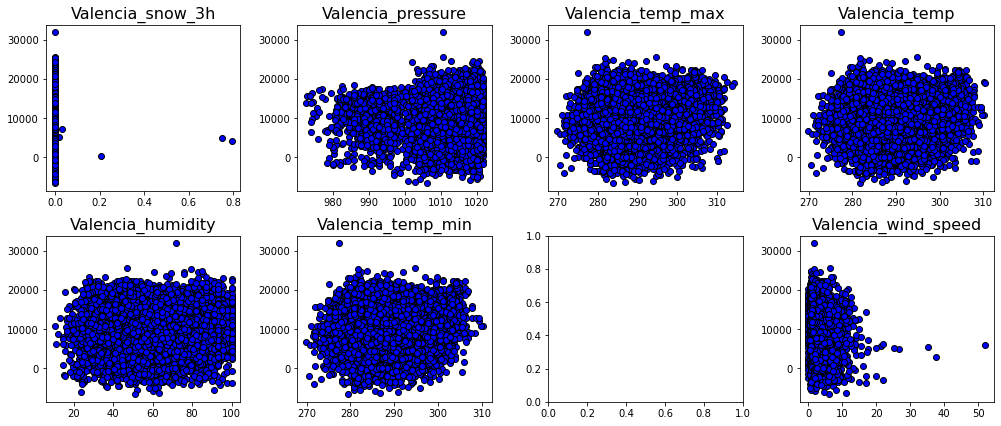

In [295]:
scatter_plot(valencia, col = 4)

**From the above scatter plots between the predictors and the response variable, we can see that the following predictors do no exhibit a linear relationship with the response variable, however we would still perform some statistical tests to determine wich columns would be a good fit for the model building phase**

**1. Valencia_snow_3h**

**2. Valencia_wind_speed**

**The other Variables have a good linear relationship with the predictor**

In [288]:
valencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Valencia_wind_speed  8763 non-null   float64
 1   Valencia_snow_3h     8763 non-null   float64
 2   Valencia_pressure    6695 non-null   float64
 3   Valencia_temp_max    8763 non-null   float64
 4   Valencia_temp        8763 non-null   float64
 5   Valencia_humidity    8763 non-null   float64
 6   Valencia_temp_min    8763 non-null   float64
 7   load_shortfall_3h    8763 non-null   float64
dtypes: float64(8)
memory usage: 547.8 KB


## Test for Multicollinearity

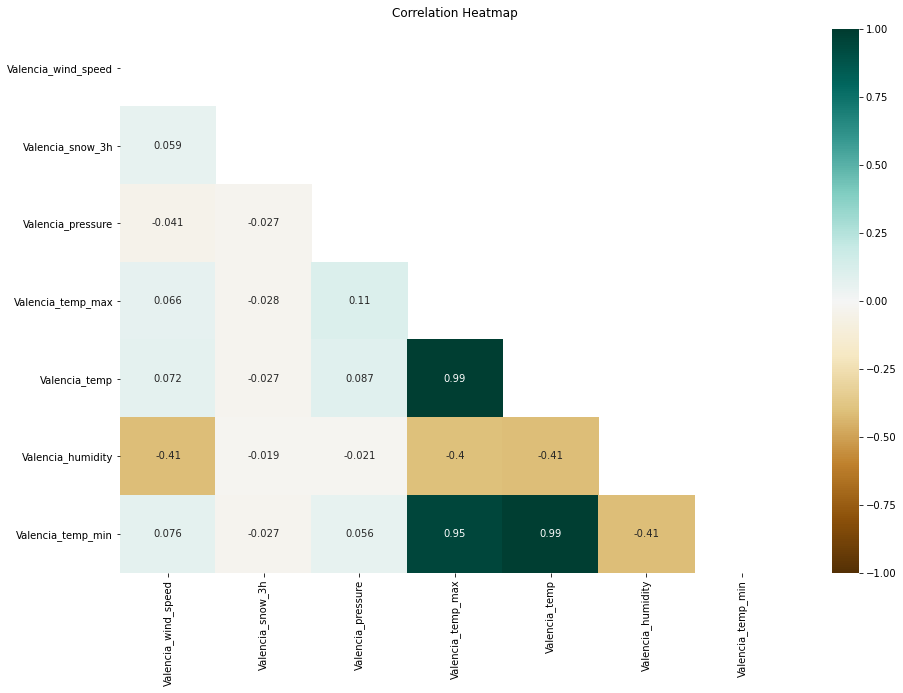

In [301]:
heat_map(valencia)

**We Do not desire our predictors variables to exhibit multicollinearity(Correlation) with one another. From the correlation Heat map above the following variables Exhibit a high Correlation with each other which is not desirable**

**1. Valencia_temp and Valencia_temp_max (0.99)**

**2. Valencia_temp_min and Valencia_temp_max (0.95)**

**3. Valencia_temp and Valencia_temp_min (0.99)**

## Test for Correlation Between Predictors and Target Variable

**Calculate Correlation**

In [334]:
correlation_df(valencia)

,Correlations
load_shortfall_3h,1.000000
Valencia_temp_min,0.201863
Valencia_temp,0.173225
Valencia_temp_max,0.144270
Valencia_pressure,0.090691
Valencia_humidity,0.043140
Valencia_snow_3h,-0.021633
Valencia_wind_speed,-0.142791


## Variable Selection by Correlation and Variance Threshold

**From the Tables we can see that none of the variables have a strong correlation with the response variable, which is not a good thing, we would still perform more statistical tests to remove perhaps the least correlated of the features**

**Calculate P-Value using Pearson Regression from Scipy**

In [354]:
pearson_pval(valencia)

,Correlation_coeff,P_Value
Valencia_temp_min,0.201863,0.000000
Valencia_temp,0.173225,0.000000
Valencia_temp_max,0.144270,0.000000
Valencia_pressure,0.090691,0.000000
Valencia_wind_speed,-0.142791,0.000000
Valencia_humidity,0.043140,0.000054
Valencia_snow_3h,-0.021633,0.042863


**If we set a p_value significance value of p-value < 0.03 we can see that almost the Variables Here are adequate predictors for the load_shortfall_3h, except Valencia_snow_3h.
Regardless we still need to check for multicollinearity amongst the predictors and remove the columns which have a high correlation with one another**

**Next we show only those values That have a high correlation with each other**

In [347]:
show_multicollinearity(valencia)

,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_temp_max,Valencia_temp_min,Valencia_temp
Valencia_temp_min,0.985479,0.949377,1.000000,0.949377,1.000000,0.985479
Valencia_temp,1.000000,0.987533,0.985479,0.987533,0.985479,1.000000
Valencia_temp_max,0.987533,1.000000,0.949377,1.000000,0.949377,0.987533


**As was previously seen by the heat maps, the following values exhibit very high correlation with one another, and judging by what they represent, it makes a lot of sense**

**1. Valencia_temp and Valencia_temp_max (0.99)**

**2. Valencia_temp_min and Valencia_temp_max (0.95)**

**3. Valencia_temp and Valencia_temmp_min (0.99)**

**On that note, we would have to drop two of these columns and use only one. The selection Criterion would be based on the variance thresholding, P-value and the correlation of each variable with the response variable.** 

## Variable Selection by Variance Thresholds

**Variance Thresholds remove features whose values don't change much from observation to observation. if we set a variance threshold of say 0.03, we would remove all the features that have a value lower than the threshold.**

**We would play around with several Threshold values**

In [342]:
variance_threshold(valencia, threshold = 0.03)

,Variable_Name,Variance
4,Valencia_wind_speed,0.002150
2,Valencia_temp_max,0.029065
0,Valencia_temp_min,0.029252
1,Valencia_temp,0.031211
3,Valencia_pressure,0.036450
5,Valencia_humidity,0.046143


**From  the Results above, the following columns are below the chosen threshold value of 0.03, and should be considered for dropping based on results from the combination of all statistical tests** 

**Now, Lets show the columns that are selected after the variance threshold**

In [344]:
show_selected_variable(valencia).head()

,Valencia_temp,Valencia_pressure,Valencia_humidity
0,0.000000,0.612245,0.728625
1,0.045397,0.646259,0.676580
2,0.200319,0.666667,0.617100
3,0.370302,0.741497,0.486989
4,0.323817,0.741497,0.535316


In [348]:
valencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Valencia_wind_speed  8763 non-null   float64
 1   Valencia_snow_3h     8763 non-null   float64
 2   Valencia_pressure    8763 non-null   float64
 3   Valencia_temp_max    8763 non-null   float64
 4   Valencia_temp        8763 non-null   float64
 5   Valencia_humidity    8763 non-null   float64
 6   Valencia_temp_min    8763 non-null   float64
 7   load_shortfall_3h    8763 non-null   float64
dtypes: float64(8)
memory usage: 547.8 KB


## Combining all statistical test results and plots to chose optimal columns

**From the combination of all the test, the following had no linear correlation with the response variable;**

**1. Valencia_temp**

**2. Valencia_pressure**

**3. Valencia_humidity**

**The following are dropped for the following Reasons;**

**1. Valencia_wind_speed --> No linear relationship, Variance below Threshold and Very poor correlation with target variable**

**2. Valencia_snow --> No linear relationship, very low Vriance, poor correlation with target variable**

**3. Valencia_temp_max --> high multicollinearity with valencia_temp_min and Valencia_temp, variance below threshold, low correlation with target variable**

**4. Valencia_temp_min --> high multicollinearity with valencia_tep_max and valencia_temp, variance_below threshold, low correlation with target variable**

In [41]:
valencia_dataset = df[['Valencia_temp',
                       'Valencia_pressure','Valencia_humidity','load_shortfall_3h']]
#'Valencia_wind_deg'

## Barcelona 

**Scatter Plot between variables and load_shortfall_3h**

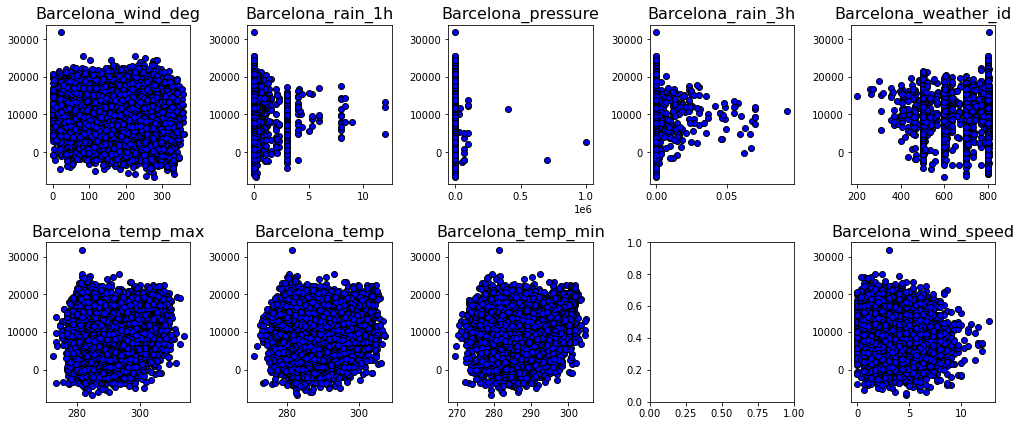

In [352]:
scatter_plot(barcelona)

**From the plot the following have no obvious linear relationship with the response variable**

**1. Barcelona_rain_1h**

**2. Barcelona_pressure**

**3. Barcelona_rain_3h**

**4. Barcelona_weather_id**

# Test for Multicollinearity

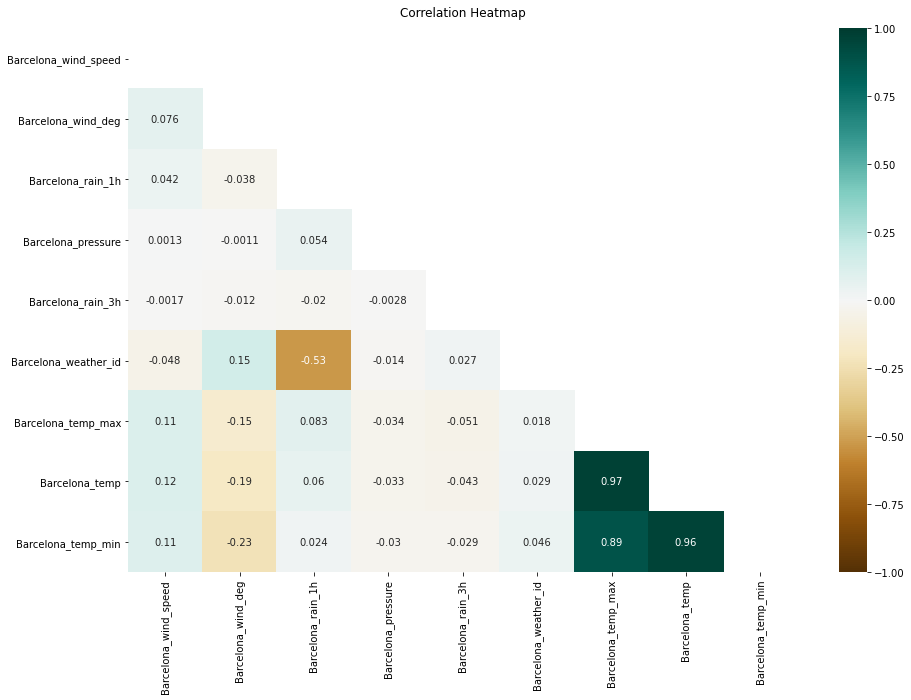

In [356]:
heat_map(barcelona)

**From the heatmap, the following have high correlation among themselves**

**Barcelona_temp_min**

**Barcelona_temp_max**

**Barcelona_temp**

## Test for Correlation Between Predictors and Target Variable

In [357]:
correlation_df(barcelona)

,Correlations
load_shortfall_3h,1.000000
Barcelona_temp_min,0.195984
Barcelona_temp,0.182673
Barcelona_temp_max,0.164734
Barcelona_weather_id,0.063868
Barcelona_rain_3h,-0.024720
Barcelona_pressure,-0.034385
Barcelona_rain_1h,-0.056633
Barcelona_wind_speed,-0.103633
Barcelona_wind_deg,-0.116133


## Variable Selection by Correlation and Variance Threshold

**From the Tables we can see that none of the variables have a strong correlation with the response variable, which is not a good thing, we would still perform more statistical tests to remove perhaps the least correlated of the features**

In [358]:
pearson_pval(barcelona)

,Correlation_coeff,P_Value
Barcelona_temp_min,0.195984,0.000000
Barcelona_temp,0.182673,0.000000
Barcelona_temp_max,0.164734,0.000000
Barcelona_weather_id,0.063868,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Barcelona_wind_speed,-0.103633,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Barcelona_pressure,-0.034385,0.001285
Barcelona_rain_3h,-0.024720,0.020665


**If we set a p_value significance value of p-value < 0.03 we can see that almost the Variables Here are adequate predictors for the load_shortfall_3h.
Regardless we still need to check for multicollinearity amongst the predictors and remove the columns which have a high correlation with one another**

**Next we show only those values That have a high correlation with each other**

In [360]:
show_multicollinearity(barcelona)

,Barcelona_temp,Barcelona_temp_min,Barcelona_temp_max,Barcelona_temp
Barcelona_temp_min,0.964089,1.000000,0.885911,0.964089
Barcelona_temp,1.000000,0.964089,0.974480,1.000000
Barcelona_temp_max,0.974480,0.885911,1.000000,0.974480


**From the correlation table we can see that Barcelona_temp, Barcelona_tem_min and barceona_temp_max are all highly correlated with each ther so we would have to drop two of them and leave one. The dropping would be highly influenced by our last statistical test**

## Variable Selection by Variance Thresholds

In [361]:
variance_threshold(barcelona, threshold = 0.03)

,Variable_Name,Variance
7,Barcelona_pressure,0.000198
8,Barcelona_rain_3h,0.001844
4,Barcelona_rain_1h,0.002797
5,Barcelona_wind_speed,0.020017
3,Barcelona_weather_id,0.021340
0,Barcelona_temp_min,0.029827
2,Barcelona_temp_max,0.030093
1,Barcelona_temp,0.031985
6,Barcelona_wind_deg,0.061218


**From  the Results above, some of the columns are below the chosen threshold value of 0.03, and should be considered for dropping based on results from the combination of all statistical tests** 

In [376]:
show_selected_variable(barcelona, threshold= 0.03).head()

,Barcelona_temp,Barcelona_temp_max,Barcelona_wind_deg
0,0.279352,0.211393,0.118519
1,0.266986,0.200628,0.386111
2,0.294986,0.225004,0.905556
3,0.345683,0.269139,0.758333
4,0.367027,0.287721,0.722222


## Combining all statistical test results and plots to chose optimal columns

**From the combination of all the test, the following columns are selected**

**1. Barcelona_temp**

**2. Barcelona_wind_deg**

**3. Barcelona_wind_speed**

**The following are dropped for the following Reasons;**

**1. Barcelona_rain_3h --> No linear relationship, Variance below Threshold and Very poor correlation with target variable**

**2. Barcelona_rain_1h --> No linear relationship, very low Variance, poor correlation with target variable**

**3. barcelona_temp_max --> high multicollinearity with barcelona_temp_min and barcelona_temp, low correlation with target variable**

**4. barcelona_temp_min --> high multicollinearity with barcelona_tep_max and barcelona_temp, variance_below threshold, low correlation with target variable**

**5. Barcelona_weather_id --> No linear relationship, low_variance below threshold, low correlation with target variable**

**6. Barcelona_pressure --> Very low variance, no linear relationship, low correlation with target variable**



In [31]:
barcelona_dataset = df[['Barcelona_temp','Barcelona_wind_deg',
                       'Barcelona_wind_speed']]

## Seville

## Test for Linearity

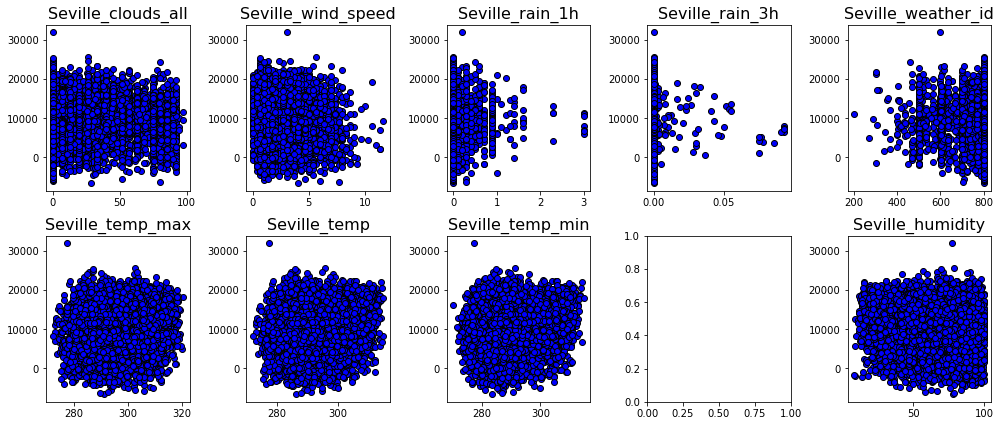

In [367]:
scatter_plot(seville)

**From the above scatter plots between the predictors and the response variable, we can see that the following predictors do no exhibit a linear relationship with the response variable, however we would still perform some statistical tests to determine which columns would be a good fit for the model building phase**

**1. Seville_rain_1h**

**2. Seville_rain_3h**

**3 Seville_weather_id**

**The other Variables have a good linear relationship with the predictor**

## Test for Multicollinearity

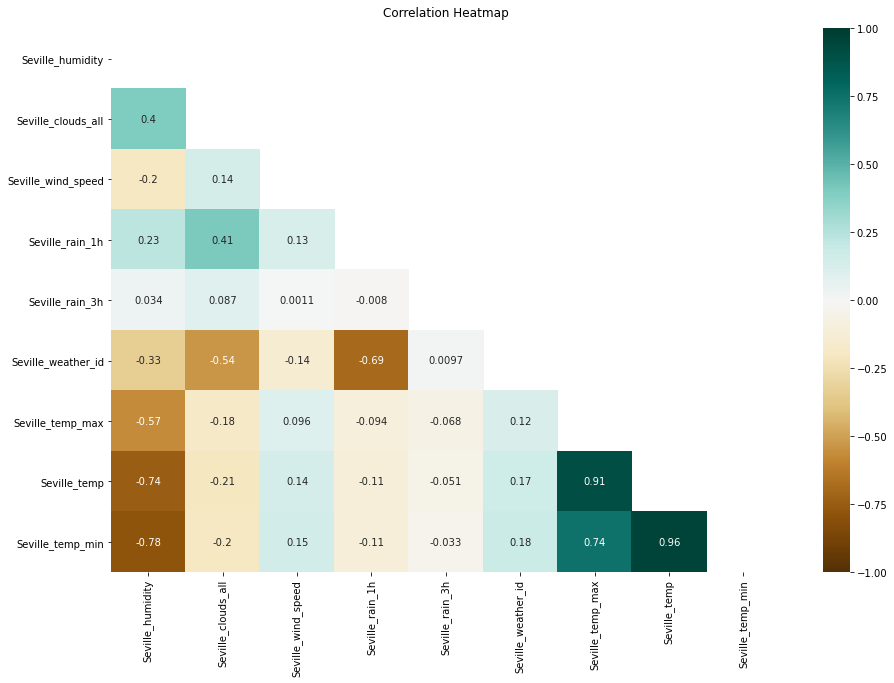

In [369]:
heat_map(seville)

**From the heatmap, the following have high correlation among themselves**

**Seville_temp_min**

**Seville_temp_max**

**Seville_temp**

## Test for Correlation Between Predictors and Target Variable

In [370]:
pearson_pval(seville)

,Correlation_coeff,P_Value
Seville_temp_min,0.174718,0.000000
Seville_temp,0.159343,0.000000
Seville_temp_max,0.109834,0.000000
Seville_weather_id,0.061104,0.000000
Seville_clouds_all,-0.091804,0.000000
Seville_humidity,-0.167290,0.000000
Seville_wind_speed,-0.048433,0.000006
Seville_rain_3h,-0.032945,0.002040
Seville_rain_1h,-0.031572,0.003118


## Variable Selection by Correlation and Variance Threshold

**From the Table we can see that none of the variables have a strong correlation with the response variable, which is not a good thing, we would still perform more statistical tests to remove perhaps the least correlated of the features**

In [371]:
pearson_pval(seville)

,Correlation_coeff,P_Value
Seville_temp_min,0.174718,0.000000
Seville_temp,0.159343,0.000000
Seville_temp_max,0.109834,0.000000
Seville_weather_id,0.061104,0.000000
Seville_clouds_all,-0.091804,0.000000
Seville_humidity,-0.167290,0.000000
Seville_wind_speed,-0.048433,0.000006
Seville_rain_3h,-0.032945,0.002040
Seville_rain_1h,-0.031572,0.003118


**If we set a p_value significance value of p-value < 0.03 we can see that almost the Variables Here are adequate predictors for the load_shortfall_3h.
Regardless we still need to check for multicollinearity amongst the predictors and remove the columns which have a high correlation with one another**

**Next we show only those values That have a high correlation with each other**

In [372]:
show_multicollinearity(seville)

,Seville_temp,Seville_temp_min,Seville_temp_max,Seville_temp
Seville_temp_min,0.955160,1.000000,0.743801,0.955160
Seville_temp,1.000000,0.955160,0.907261,1.000000
Seville_temp_max,0.907261,0.743801,1.000000,0.907261


**From the correlation table we can see that Seville_temp, Seville_temp_min and Seville_temp_max are all highly correlated with each ther so we would have to drop two of them and leave one. The dropping would be highly influenced by our last statistical test**

## Variable Selection by Variance Thresholds

In [373]:
variance_threshold(seville, threshold = 0.03)

,Variable_Name,Variance
7,Seville_rain_3h,0.001537
8,Seville_rain_1h,0.003436
3,Seville_weather_id,0.014185
6,Seville_wind_speed,0.020559
0,Seville_temp_min,0.033520
2,Seville_temp_max,0.033598
1,Seville_temp,0.034066
5,Seville_humidity,0.060892
4,Seville_clouds_all,0.062181


**From  the Results above, some of the columns are below the chosen threshold value of 0.03, and should be considered for dropping based on results from the combination of all statistical tests** 

In [375]:
show_selected_variable(seville, threshold=0.03).head()

,Seville_temp_min,Seville_temp,Seville_temp_max,Seville_clouds_all,Seville_humidity
0,0.091896,0.051072,0.045263,0.0,0.720000
1,0.107351,0.067158,0.059520,0.0,0.763636
2,0.193478,0.156803,0.138971,0.0,0.687273
3,0.341284,0.310647,0.275318,0.0,0.621818
4,0.343964,0.313437,0.277791,0.0,0.552727


**From the combination of all the test, the following columns are selected**

**1. Seville_temp**

**2. Seville_cloud_all**

**3. Seville_humidity**

**4. Seville_wind_speed**

**The following are dropped for the following Reasons;**

**1. Seville_rain_3h --> No linear relationship, Variance below Threshold and Very poor correlation with target variable**

**2. Seville_rain_1h --> No linear relationship, Variance below threshold, poor correlation with target variable**

**3. Seville_temp_max --> high multicollinearity with Seville_temp_min and Seville_temp, low correlation with target variable**

**4. Seville_temp_min --> high multicollinearity with Seville_temp_max and Seville_temp, variance_below threshold, low correlation with target variable**

**5. Seville_weather_id --> No linear relationship, low_variance below threshold, low correlation with target variable**

In [32]:
seville_dataset = df[['Seville_temp','Seville_clouds_all',
                     'Seville_humidity','Seville_wind_speed']]

## Madrid

## Test for Linearity

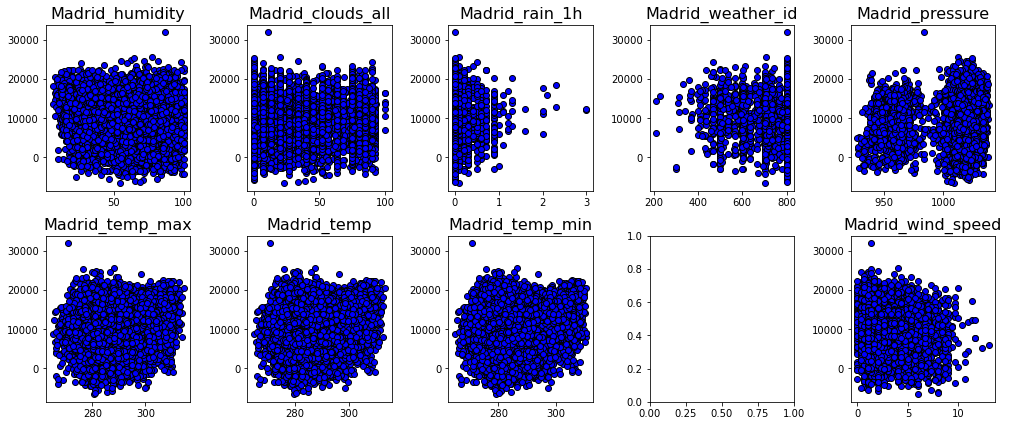

In [379]:
scatter_plot(madrid)

**From the above scatter plots between the predictors and the response variable, we can see that the following predictors do no exhibit a linear relationship with the response variable, however we would still perform some statistical tests to determine wich columns would be a good fit for the model building phase**

**1. Madrid_rain_1h**

**2. Madrid_weather_id**

**The other Variables have a good linear relationship with the predictor**

## Test for Multicollinearity

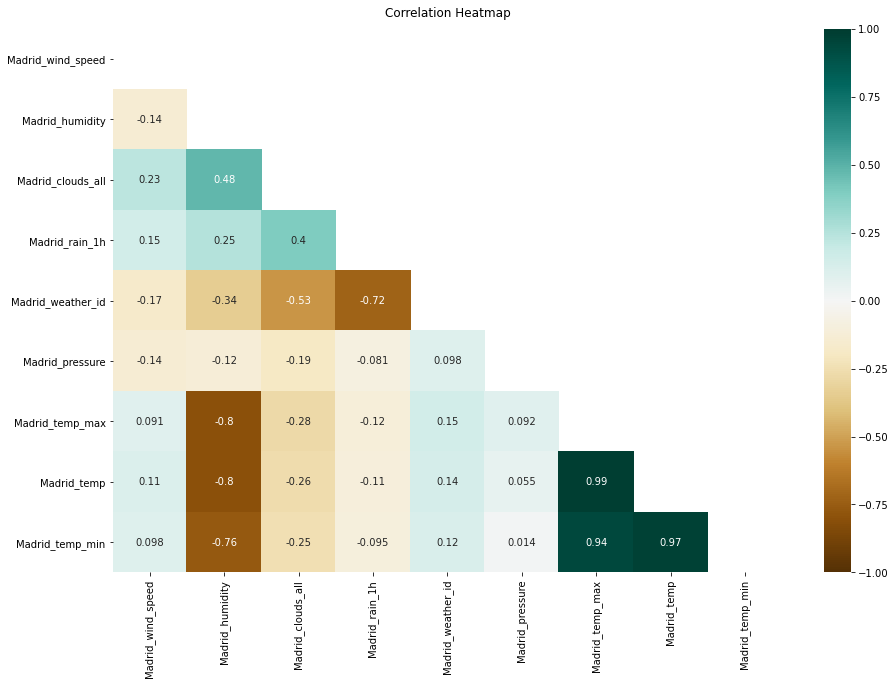

In [381]:
heat_map(madrid)

**From the heatmap, the following have high correlation among themselves**

**Madrid_temp_min**

**Madrid_temp_max**

**Madrid_temp**

## Test for Correlation Between Predictors and Target Variable

In [382]:
correlation_df(madrid)

,Correlations
load_shortfall_3h,1.000000
Madrid_temp,0.186036
Madrid_temp_max,0.182548
Madrid_temp_min,0.174744
Madrid_pressure,0.092638
Madrid_weather_id,0.030868
Madrid_rain_1h,-0.027159
Madrid_clouds_all,-0.081623
Madrid_humidity,-0.150536
Madrid_wind_speed,-0.150981


## Variable Selection by Correlation and Variance Threshold

**From the Tables we can see that none of the variables have a strong correlation with the response variable, which is not a good thing, we would still perform more statistical tests to remove perhaps the least correlated of the features**

In [383]:
pearson_pval(madrid)

,Correlation_coeff,P_Value
Madrid_temp,0.186036,0.000000
Madrid_temp_max,0.182548,0.000000
Madrid_temp_min,0.174744,0.000000
Madrid_pressure,0.092638,0.000000
Madrid_clouds_all,-0.081623,0.000000
Madrid_humidity,-0.150536,0.000000
Madrid_wind_speed,-0.150981,0.000000
Madrid_weather_id,0.030868,0.003854
Madrid_rain_1h,-0.027159,0.011008


In [384]:
show_autocorrelation(madrid)

,Madrid_temp_max,Madrid_temp_min,Madrid_temp,Madrid_temp_min,Madrid_temp,Madrid_temp_max
Madrid_temp,0.988871,0.973641,1.000000,0.973641,1.000000,0.988871
Madrid_temp_max,1.000000,0.939147,0.988871,0.939147,0.988871,1.000000
Madrid_temp_min,0.939147,1.000000,0.973641,1.000000,0.973641,0.939147


**From the correlation table we can see that Madrid_temp, Madrid_temp_min and Madrid_temp_max are all highly correlated with each ther so we would have to drop two of them and leave one. The dropping would be highly influenced by our last statistical test**

## Variable Selection by Variance Thresholds

In [385]:
variance_threshold(madrid, threshold = 0.03)

,Variable_Name,Variance
8,Madrid_rain_1h,0.002588
7,Madrid_weather_id,0.016996
6,Madrid_wind_speed,0.020257
0,Madrid_temp,0.037678
1,Madrid_temp_max,0.038809
3,Madrid_pressure,0.040475
2,Madrid_temp_min,0.041115
5,Madrid_humidity,0.067493
4,Madrid_clouds_all,0.078692


In [386]:
show_selected_variable(madrid, threshold = 0.03).head()

,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_pressure,Madrid_clouds_all,Madrid_humidity
0,0.019827,0.019286,0.021028,0.395770,0.0,0.615658
1,0.029145,0.028350,0.030910,0.407855,0.0,0.622776
2,0.160443,0.156067,0.170162,0.419940,0.0,0.619217
3,0.351233,0.341654,0.372508,0.607251,0.0,0.533808
4,0.325963,0.317073,0.345707,0.975831,0.0,0.540925


**From the combination of all the test, the following columns are selected**

**1. Madrid_temp**

**2. Madrid_pressure**

**3. Madrid_clouds_all**

**4. Madrid_humidity**

**5. Madrid_wind_speed**

**The following are dropped for the following Reasons;**

**1. Madrid_rain_1h --> No linear relationship, Variance below threshold, poor correlation with target variable**

**2. Madrid_temp_max --> high multicollinearity with Madrid_temp_min and Madrid_temp, low correlation with target variable**

**3. Madrid_temp_min --> high multicollinearity with Madrid_temp_max and Madrid_temp, variance_below threshold, low correlation with target variable**

**4. Madrid_weather_id --> No linear relationship, low_variance below threshold, low correlation with target variable**

In [33]:
madrid_dataset = df[['Madrid_temp','Madrid_pressure',
                 'Madrid_clouds_all','Madrid_humidity',
                 'Madrid_wind_speed']]

## Bilbao

## Test for Linearity

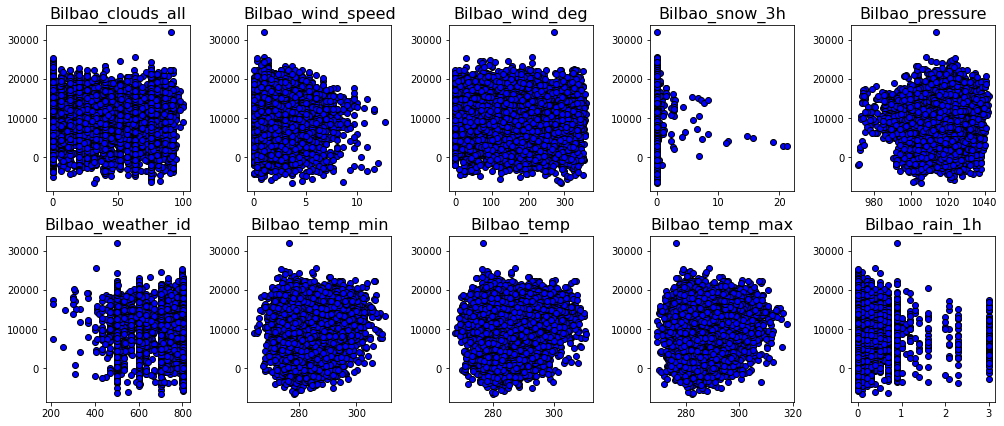

In [389]:
scatter_plot(bilbao)

**From the above scatter plots between the predictors and the response variable, we can see that the following predictors do no exhibit a linear relationship with the response variable, however we would still perform some statistical tests to determine wich columns would be a good fit for the model building phase**

**1. Bilbao_snow_3h**

**2. Bilbao_weather_id**

**3. Bilbao_rain_1h**

**The other Variables have a good linear relationship with the predictor**

## Test for Multicollinearity

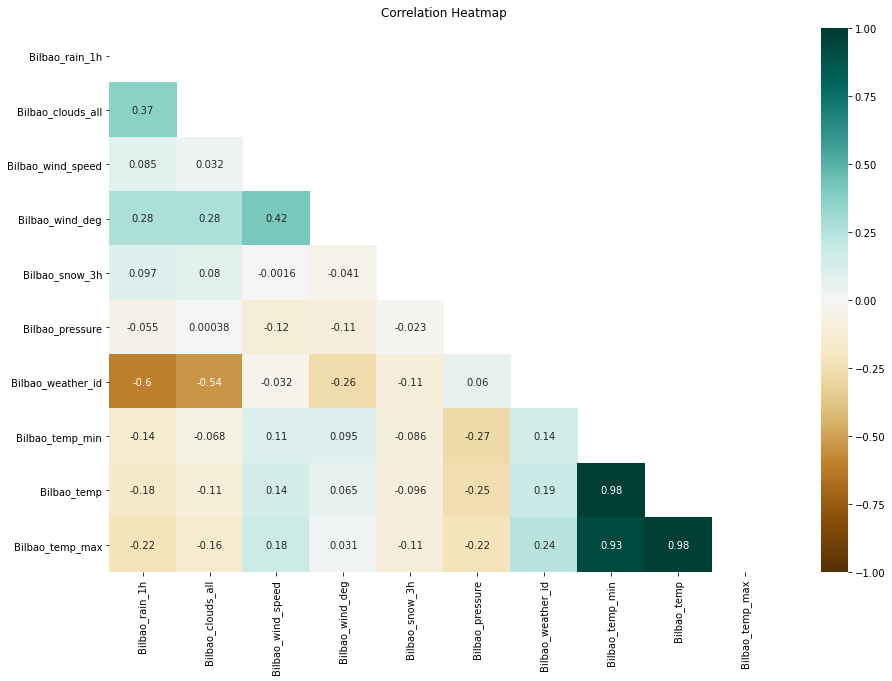

In [390]:
heat_map(bilbao)

**From the heatmap, the following have high correlation among themselves**

**Bilbao_temp_min**

**Bilbao_temp_max**

**Bilbao_temp**

## Test for Correlation Between Predictors and Target Variable

In [391]:
correlation_df(bilbao)

,Correlations
load_shortfall_3h,1.000000
Bilbao_temp_max,0.180934
Bilbao_temp,0.176411
Bilbao_temp_min,0.172920
Bilbao_weather_id,0.145875
Bilbao_pressure,0.039052
Bilbao_snow_3h,-0.031721
Bilbao_wind_speed,-0.081602
Bilbao_wind_deg,-0.120800
Bilbao_clouds_all,-0.127293


## Variable Selection by Correlation and Variance Threshold

In [392]:
pearson_pval(bilbao)

,Correlation_coeff,P_Value
Bilbao_temp_max,0.180934,0.000000
Bilbao_temp,0.176411,0.000000
Bilbao_temp_min,0.172920,0.000000
Bilbao_weather_id,0.145875,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_rain_1h,-0.152510,0.000000
Bilbao_pressure,0.039052,0.000256
Bilbao_snow_3h,-0.031721,0.002981


**If we set a p_value significance value of p-value < 0.03 we can see that allthe Variables Here are adequate predictors for the load_shortfall_3h,
Regardless we still need to check for multicollinearity amongst the predictors and remove the columns which have a high correlation with one another**

**Next we show only those values That have a high correlation with each other**

In [393]:
show_multicollinearity(bilbao)

,Bilbao_temp,Bilbao_temp_min,Bilbao_temp_max,Bilbao_temp_min,Bilbao_temp_max,Bilbao_temp
Bilbao_temp_max,0.981624,0.932219,1.000000,0.932219,1.000000,0.981624
Bilbao_temp,1.000000,0.982936,0.981624,0.982936,0.981624,1.000000
Bilbao_temp_min,0.982936,1.000000,0.932219,1.000000,0.932219,0.982936


**From the correlation table we can see that Bilbao_temp, Bilbao_temp_min and Bilbao_temp_max are all highly correlated with each ther so we would have to drop two of them and leave one. The dropping would be highly influenced by our last statistical test**

## Variable Selection by Variance Thresholds

In [395]:
variance_threshold(bilbao, threshold = 0.03)

,Variable_Name,Variance
9,Bilbao_snow_3h,0.000684
7,Bilbao_rain_1h,0.015615
4,Bilbao_wind_speed,0.017923
8,Bilbao_pressure,0.020208
0,Bilbao_temp_max,0.021109
2,Bilbao_temp_min,0.021878
1,Bilbao_temp,0.024880
3,Bilbao_weather_id,0.037692
5,Bilbao_wind_deg,0.080656
6,Bilbao_clouds_all,0.105945


**From  the Results above, some of the columns are below the chosen threshold value of 0.03, and should be considered for dropping based on results from the combination of all statistical tests** 

In [396]:
show_selected_variable(bilbao).head()

,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_clouds_all
0,0.993296,0.621521,0.00
1,0.993296,0.615028,0.00
2,0.993296,0.596475,0.00
3,0.993296,0.555659,0.00
4,0.993296,0.514842,0.02


**From the combination of all the test, the following columns are selected**

**1. Bilbao_temp**

**2. Bilbao_wind_speed**

**3. Bilbao_wind_deg**

**4. Bilbao_pressure**

**5. Bilbao_clouds_all**

**The following are dropped for the following Reasons;**

**1. Bilbao_rain_1h --> No linear relationship, Variance below threshold, poor correlation with target variable**

**2. Bilbao_temp_max --> high multicollinearity with Bilbao_temp_min and Bilbao_temp, low correlation with target variable**

**3. Bilbao_temp_min --> high multicollinearity with Bilbao_temp_max and Bilbao_temp, variance_below threshold, low correlation with target variable**

**4. Bilbao_weather_id --> No linear relationship, low correlation with target variable**

**5. Bilbao_snow_3h --> No linear relationship, low correlation with target variable, variance below threshold**

In [34]:
bilbao_dataset = df[['Bilbao_temp','Bilbao_wind_speed',
                 'Bilbao_wind_deg','Bilbao_pressure',
                 'Bilbao_clouds_all']]

In [42]:
train_data = pd.concat([bilbao_dataset,
                      seville_dataset,
                      barcelona_dataset,
                      madrid_dataset,
                      valencia_dataset], axis = 1)
train_data.head()

,Bilbao_temp,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_pressure,Bilbao_clouds_all,Seville_temp,Seville_clouds_all,Seville_humidity,Seville_wind_speed,Barcelona_temp,Barcelona_wind_deg,Barcelona_wind_speed,Madrid_temp,Madrid_pressure,Madrid_clouds_all,Madrid_humidity,Madrid_wind_speed,Valencia_temp,Valencia_pressure,Valencia_humidity,load_shortfall_3h
0,269.338615,1.000000,223.333333,1035.000000,0.0,274.254667,0.0,74.333333,3.333333,281.013000,42.666667,6.333333,265.938000,971.333333,0.0,64.000000,0.666667,269.888000,1002.666667,75.666667,6715.666667
1,270.376000,1.000000,221.000000,1035.666667,0.0,274.945000,0.0,78.333333,3.333333,280.561667,139.000000,4.000000,266.386667,972.666667,0.0,64.666667,0.333333,271.728333,1004.333333,71.000000,4171.666667
2,275.027229,1.000000,214.333333,1036.000000,0.0,278.792000,0.0,71.333333,2.666667,281.583667,326.000000,2.000000,272.708667,974.000000,0.0,64.333333,1.000000,278.008667,1005.333333,65.666667,4274.666667
3,281.135063,1.000000,199.666667,1036.000000,0.0,285.394000,0.0,65.333333,4.000000,283.434104,273.000000,2.333333,281.895219,994.666667,0.0,56.333333,1.000000,284.899552,1009.000000,54.000000,5075.666667
4,282.252063,0.333333,185.000000,1035.333333,2.0,285.513719,0.0,59.000000,3.000000,284.213167,260.000000,4.333333,280.678437,1035.333333,0.0,57.000000,1.000000,283.015115,1009.000000,58.333333,6620.666667


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [91]:
X = train_data.drop(columns = ['load_shortfall_3h'])
y = train_data['load_shortfall_3h']

In [98]:
X = df.drop(columns = ['load_shortfall_3h','time','Valencia_wind_deg','Seville_pressure'])
y = df['load_shortfall_3h']

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [100]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_scaled, y)

LinearRegression()

In [101]:
from sklearn.metrics import r2_score
y_pred = l_reg.predict(x_scaled)
r_squared = r2_score(y, y_pred)
r_squared

0.1514187116214788

In [65]:
X.head()

,Bilbao_temp,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_pressure,Bilbao_clouds_all,Seville_temp,Seville_clouds_all,Seville_humidity,Seville_wind_speed,Barcelona_temp,Barcelona_wind_deg,Barcelona_wind_speed,Madrid_temp,Madrid_pressure,Madrid_clouds_all,Madrid_humidity,Madrid_wind_speed,Valencia_temp,Valencia_pressure,Valencia_humidity
0,269.338615,1.000000,223.333333,1035.000000,0.0,274.254667,0.0,74.333333,3.333333,281.013000,42.666667,6.333333,265.938000,971.333333,0.0,64.000000,0.666667,269.888000,1002.666667,75.666667
1,270.376000,1.000000,221.000000,1035.666667,0.0,274.945000,0.0,78.333333,3.333333,280.561667,139.000000,4.000000,266.386667,972.666667,0.0,64.666667,0.333333,271.728333,1004.333333,71.000000
2,275.027229,1.000000,214.333333,1036.000000,0.0,278.792000,0.0,71.333333,2.666667,281.583667,326.000000,2.000000,272.708667,974.000000,0.0,64.333333,1.000000,278.008667,1005.333333,65.666667
3,281.135063,1.000000,199.666667,1036.000000,0.0,285.394000,0.0,65.333333,4.000000,283.434104,273.000000,2.333333,281.895219,994.666667,0.0,56.333333,1.000000,284.899552,1009.000000,54.000000
4,282.252063,0.333333,185.000000,1035.333333,2.0,285.513719,0.0,59.000000,3.000000,284.213167,260.000000,4.333333,280.678437,1035.333333,0.0,57.000000,1.000000,283.015115,1009.000000,58.333333


## Statsmodel Analysis

In [80]:
import statsmodels.formula.api as sm

In [101]:
data = valencia.drop(columns=['time','Valencia_wind_deg'])
data.columns

Index(['Valencia_wind_speed', 'Valencia_snow_3h', 'Valencia_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'load_shortfall_3h'],
      dtype='object')

In [114]:
formula = data.columns[-1] + ' ~ ' + '+'.join(data.columns[:-1]); formula

'load_shortfall_3h ~ Valencia_wind_speed+Valencia_snow_3h+Valencia_pressure+Valencia_temp_max+Valencia_temp+Valencia_humidity+Valencia_temp_min'

In [115]:
model = sm.ols(formula = formula, data=df)
fit_model = model.fit()

In [116]:
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     132.1
Date:                Fri, 11 Feb 2022   Prob (F-statistic):          9.12e-183
Time:                        12:55:52   Log-Likelihood:                -66447.
No. Observations:                6695   AIC:                         1.329e+05
Df Residuals:                    6687   BIC:                         1.330e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.115e+05   7

## Recommendations

**1. Use forward fill method to fill missing data points for Valencia_pressure**

**2. Use Values from Valencia_wind to generate new features for wind speed based on a threshold, say if wind_speed greater      than 4 std set as high else set as Low**

**3. Either drop Valencia_wind_deg or Encode using a label Encoder for analysis**

**4. Drop Valencia_temp_max and Valencia_temmp_min as they share a very high correlation with valencia_temp**

In [213]:
valencia.Valencia_wind_speed.describe()

count    8763.000000
mean        2.586272
std         2.411190
min         0.000000
25%         1.000000
50%         1.666667
75%         3.666667
max        52.000000
Name: Valencia_wind_speed, dtype: float64

In [ ]:
from sklea